# Practica 2

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Cargar imagen de la carretera (calibración)

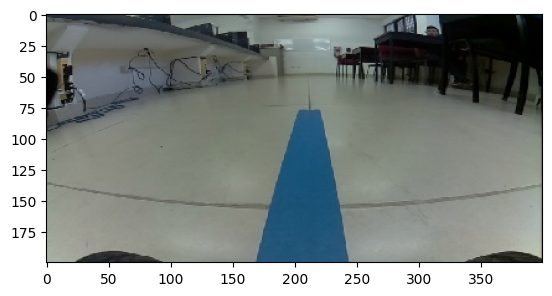

In [2]:
img=cv.imread("Ayil_1.jpg")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Tamaño de la figura: (200, 400, 3)


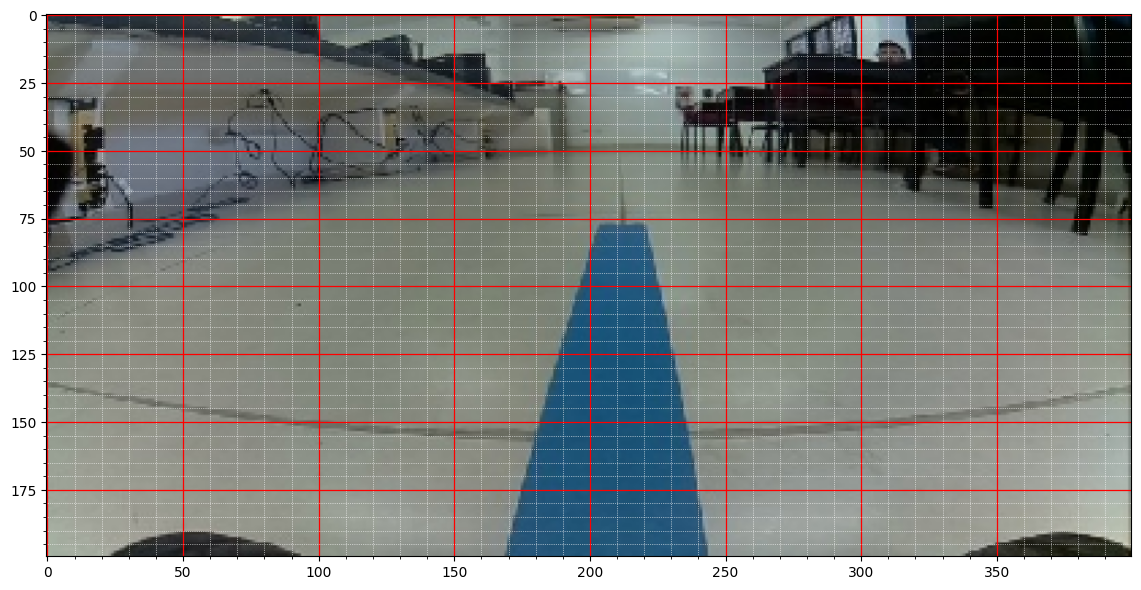

In [3]:
#Ampliar y mejorar la visibilidad del plano cartesiano
fig, ax= plt.subplots(figsize=(14,14))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')
print("Tamaño de la figura:",img.shape)

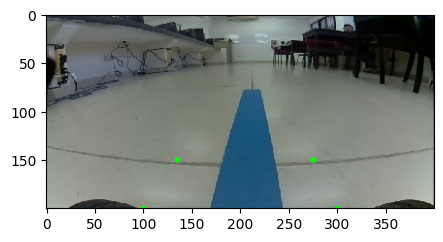

In [4]:
#Puntos de las esquinas (100,150), (420,150), (30,326), (500,326)
P1=(135, 150)
P2=(275, 150)
P3=(100, 200)
P4=(300, 200)

img = cv.imread("Ayil_1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

cv.circle(img, P1 , 3, (0,255,0), -1 )
cv.circle(img, P2 , 3, (0,255,0), -1 )
cv.circle(img, P3 , 3, (0,255,0), -1 )
cv.circle(img, P4 , 3, (0,255,0), -1 )

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img)

In [5]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
ratio= 1
altura = 200*ratio
ancho = 400*ratio

pts1 = np.float32( [  P1, P2, P3, P4] )
pts2 = np.float32( [ [0,0] , [ancho,0], [0, altura] ,[ancho, altura] ] )

matrix = cv.getPerspectiveTransform(pts1, pts2)
img_NewPerspective = cv.warpPerspective(img, matrix, (ancho,altura))

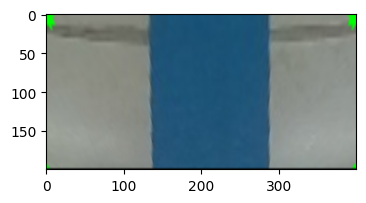

In [6]:
#Imagen final de la carretera
plt.figure(figsize = (4,4))
plt.imshow(img_NewPerspective)
plt.show()

# Funciones 

In [7]:
#Conversion HSV
#(hMin = 84 , sMin = 138, vMin = 91), (hMax = 179 , sMax = 255, vMax = 255)
#90,116,54 - 179,255,255
def hsv_convert(img):
    return cv.cvtColor(img, cv.COLOR_RGB2HSV)

#Máscara azul
def f_mask_blue(img):
    lower_blue1 = np.array([90,116,54])
    upper_blue1 = np.array([179,255,255])
    img_hsv=hsv_convert(img)
    mask_blue = cv.inRange(img_hsv, lower_blue1, upper_blue1)
    return mask_blue

# Imagen binarizada

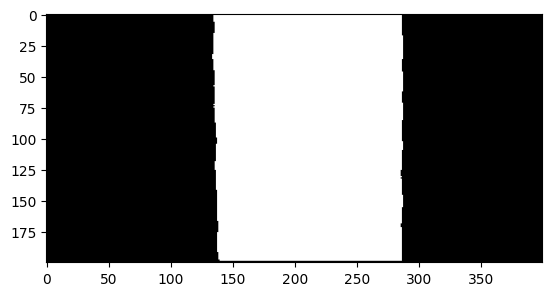

In [8]:
img_bin=f_mask_blue(img_NewPerspective)
plt.imshow(img_bin,cmap='gray')
plt.show()

In [9]:
#Función punto medio
def punto_medio(imagen):
    img_cercana= imagen[180:, :]
    suma_columnas = img_cercana.sum(axis=0)
    x_pos = np.arange(len(suma_columnas))
    mid_point=int( np.dot(x_pos,suma_columnas) / np.sum( suma_columnas ) )
    return mid_point

In [10]:
mid_point = punto_medio(img_bin)

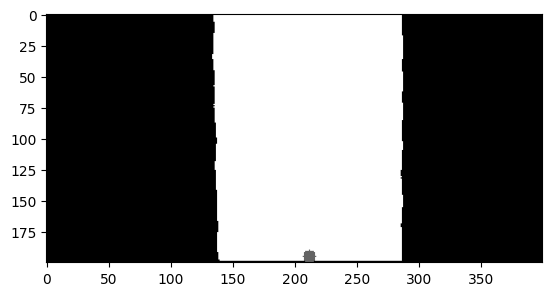

In [11]:
cv.circle(img_bin, (mid_point, 195), 5, (100,100,100), -1)
plt.imshow(img_bin, cmap='gray')
plt.show()

# Integrar todas las operaciones en una sola celda para poder implementar en la RBP

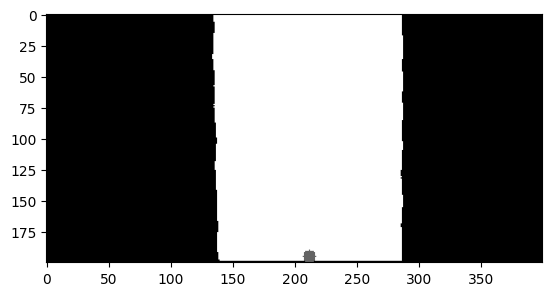

In [12]:
#ESTE LO PUSE DE NUEVO PARA CARGAR LA IMG EN CASO DE QUE MODIFIQUE Y NECESITE LA IMG LIMPIA
img=cv.imread("Ayil_1.jpg")
img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

#ESTOS SE QUITAN PARA NO IMPRIMIR LA REJILLA
#fig, ax= plt.subplots(figsize=(14,14))
#ax.imshow(img)
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

P1=(135, 150)
P2=(275, 150)
P3=(100, 200)
P4=(300, 200)
#ESTOS SE QUITAN PARA NO IMPRIMIR LOS PUNTOS DE LAS ESQUINAS
#cv.circle(img, P1 , 3, (0,255,0), -1 )
#cv.circle(img, P2 , 3, (0,255,0), -1 )
#cv.circle(img, P3 , 3, (0,255,0), -1 )
#cv.circle(img, P4 , 3, (0,255,0), -1 )

ratio= 1
altura = 200*ratio
ancho = 400*ratio

pts1 = np.float32( [  P1, P2, P3, P4] )
pts2 = np.float32( [ [0,0] , [ancho,0], [0, altura] ,[ancho, altura] ] )

matrix = cv.getPerspectiveTransform(pts1, pts2)
img_NewPerspective = cv.warpPerspective(img, matrix, (ancho,altura))

def hsv_convert(img):
    return cv.cvtColor(img, cv.COLOR_RGB2HSV)

#Máscara azul
def f_mask_blue(img):
    lower_blue1 = np.array([90,116,54])
    upper_blue1 = np.array([179,255,255])
    img_hsv=hsv_convert(img)
    mask_blue = cv.inRange(img_hsv, lower_blue1, upper_blue1)
    return mask_blue

img_bin=f_mask_blue(img_NewPerspective)

def punto_medio(imagen):
    img_cercana= imagen[180:, :]
    suma_columnas = img_cercana.sum(axis=0)
    x_pos = np.arange(len(suma_columnas))
    mid_point=int( np.dot(x_pos,suma_columnas) / np.sum( suma_columnas ) )
    return mid_point

mid_point = punto_medio(img_bin)

cv.circle(img_bin, (mid_point, 195), 5, (100,100,100), -1)
plt.imshow(img_bin, cmap='gray')
plt.show()

# Calcular la suma a la izquierda y a la derecha

In [13]:
#Funcion suma normalizada izquierda
def sum_izquierda(imagen, valor_punto_medio):
    return np.round(np.sum( imagen[:, :valor_punto_medio].sum(axis=0) )/(255*200*400),2)

#Funcion suma normalizada derecha
def sum_derecha(imagen, valor_punto_medio):
    return  np.round(np.sum( imagen[:, valor_punto_medio:].sum(axis=0) )/(255*200*400),2)


In [14]:
sum_derecha(img_bin, mid_point)

0.19

In [15]:
sum_izquierda(img_bin, mid_point)

0.19

Sin parar


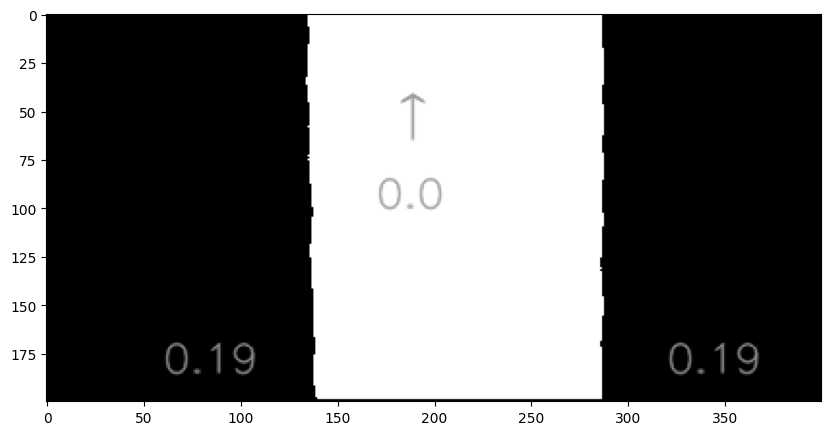

In [31]:
#Aplicamos todas las funciones
img=cv.imread("Ayil_1.jpg")
img_bin=f_mask_blue(img_NewPerspective)

# textos
text1 = str(sum_izquierda(img_bin, mid_point ))
text2 = str(sum_derecha(img_bin, mid_point ))
delta = sum_derecha(img_bin, mid_point ) - sum_derecha(img_bin, mid_point )
text3 = str(np.round(delta,2))

font = cv.FONT_HERSHEY_SIMPLEX # Tipo de fuente

# origen de cada texto
org1 = (60, 185) #ORIGEN DEL TEXTO A LA DER
org2 = (320, 185) #ORIGEN DEL TEXTO A LA IZQ
org3 = (170, 100) #ORIGEN DEL TEXTO AL CENTRO
org4 = (170, 50) #ORIGEN DE LA FLECHA AL CENTRO

fontScale = 0.7 # Tamaño
color = (150, 150, 150) # Color de la fuente
thickness = 1 # Grosor de la linea del texto

# Usamos la función cv.putText() para agregar texto
cv.putText(img_bin, text1, org1, font, fontScale, color, thickness, cv.LINE_AA, False)
cv.putText(img_bin, text2, org2, font, fontScale, color, thickness, cv.LINE_AA, False)
cv.putText(img_bin, text3, org3, font, fontScale, color, thickness, cv.LINE_AA, False)

#Derecha
if delta < -0.15:
    print('Girar derecha')
    cv.putText(img_bin, '-->', org4, font, fontScale, color, thickness, cv.LINE_AA, False)
elif delta > 0.15:
    print('Girar izquierda')
    cv.putText(img_bin, '<--', org4, font, fontScale, color, thickness, cv.LINE_AA, False)
else:
    print('Sin parar')
    cv.putText(img_bin, ' ^', org4, font, fontScale, color, thickness, cv.LINE_AA, False)
    cv.putText(img_bin, '|', (186, 60), font, fontScale, color, thickness, cv.LINE_AA, False)

plt.figure(figsize=(10,7))
cv.circle(img_bin, (mid_point,235), 5, (100, 100,100 ), -1) ;
plt.imshow(img_bin,cmap='gray')
plt.show()

# ¿Cómo decidir en que momento comenzar a girar?